In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('auto-mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


C:\Users\Nishi\AppData\Local\Temp\ipykernel_13400\2271070662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


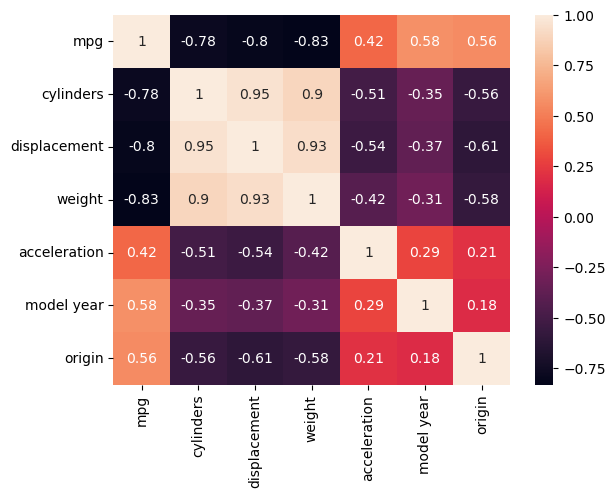

In [6]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [7]:
df['car name'].value_counts()

ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: car name, Length: 305, dtype: int64

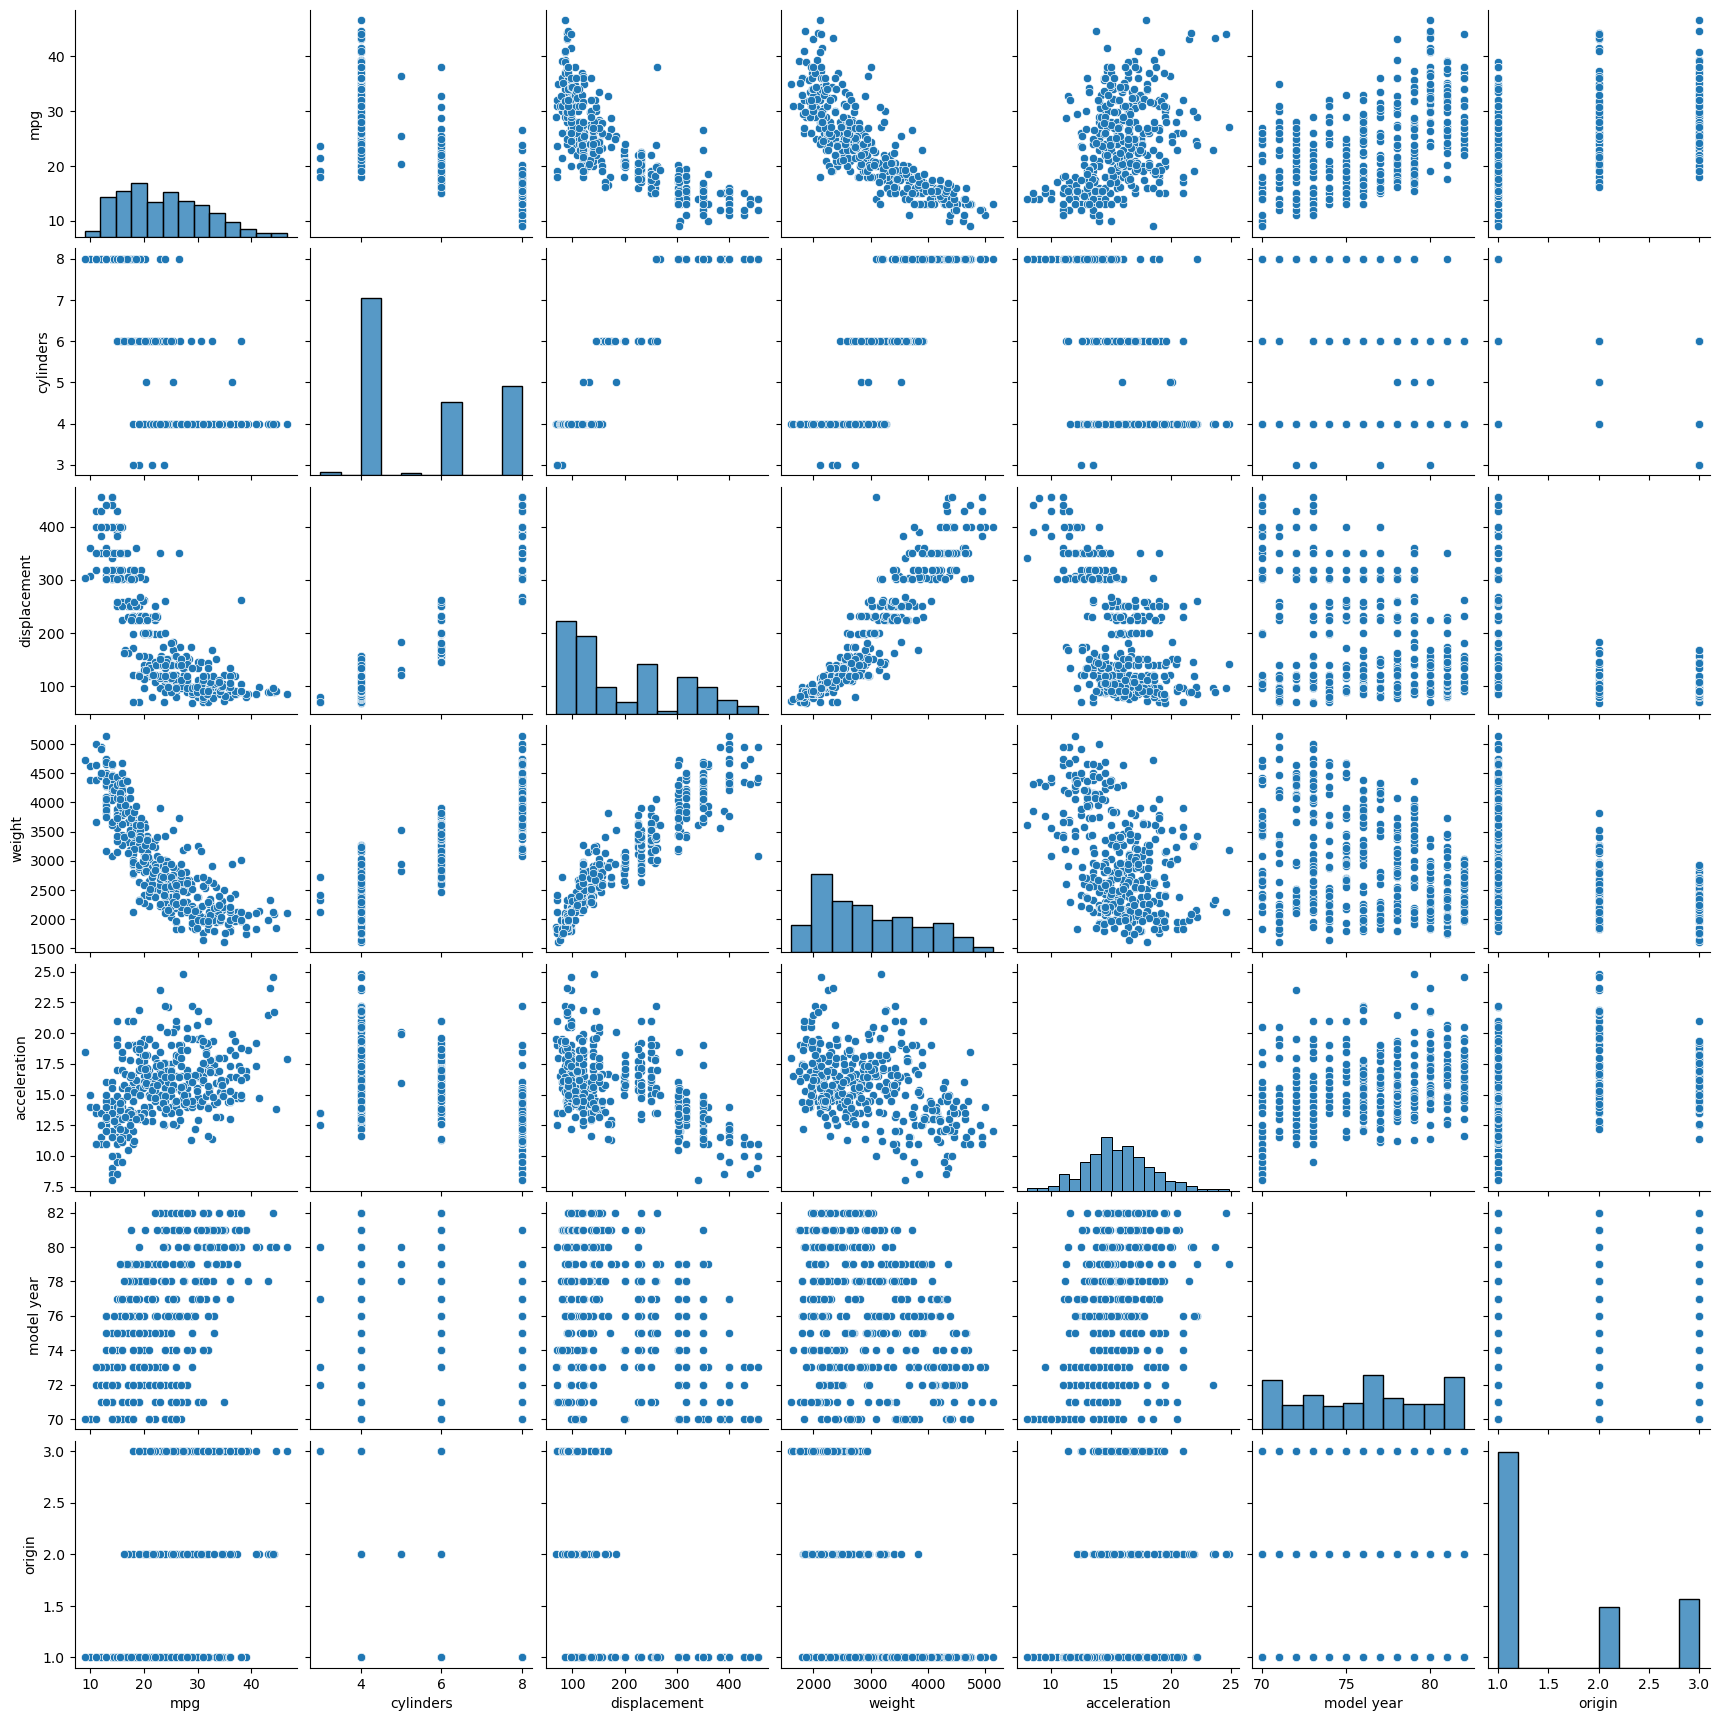

In [8]:
sns.pairplot(df)
plt.show()

In [9]:
df[df['horsepower'].str.isnumeric()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [10]:
# As we can see there are 6 values and replace these values to nan

df['horsepower'].replace({'?':np.nan},inplace=True)

In [11]:
df[df['horsepower'].str.isnumeric()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [12]:
# As we can see car name is irrelevent to the for the dataset so we can drop it

df.drop('car name',axis=1,inplace=True)

In [13]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [14]:
# we need to fill the nan value of the horsepower with the median


df=df.apply(lambda x:x.fillna(x.median()),axis=0)

#df.replace({df.horsepower.isnull():df.horsepower.median()},inplace=True)
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#Horsepower = imputer.fit_transform(df.loc[:,'horsepower'].reshape(1, -1))
 


In [15]:
# split the data into dependent and independent variable
X=df.drop('mpg',axis=1)
y = df[['mpg']]

In [16]:
print(X)

     cylinders  displacement horsepower  weight  acceleration  model year  \
0            8         307.0        130    3504          12.0          70   
1            8         350.0        165    3693          11.5          70   
2            8         318.0        150    3436          11.0          70   
3            8         304.0        150    3433          12.0          70   
4            8         302.0        140    3449          10.5          70   
..         ...           ...        ...     ...           ...         ...   
393          4         140.0         86    2790          15.6          82   
394          4          97.0         52    2130          24.6          82   
395          4         135.0         84    2295          11.6          82   
396          4         120.0         79    2625          18.6          82   
397          4         119.0         82    2720          19.4          82   

     origin  
0         1  
1         1  
2         1  
3         1  
4    

In [17]:
print(y)

      mpg
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
..    ...
393  27.0
394  44.0
395  32.0
396  28.0
397  31.0

[398 rows x 1 columns]


In [18]:
# Now split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(318, 7)
(80, 7)
(318, 1)
(80, 1)


C:\Users\Nishi\AppData\Local\Temp\ipykernel_13400\3216077726.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i])
C:\Users\Nishi\AppData\Local\Temp\ipykernel_13400\3216077726.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i])
C:\Users\Nishi\AppData\Local\Temp\ipykernel_13400\32160777

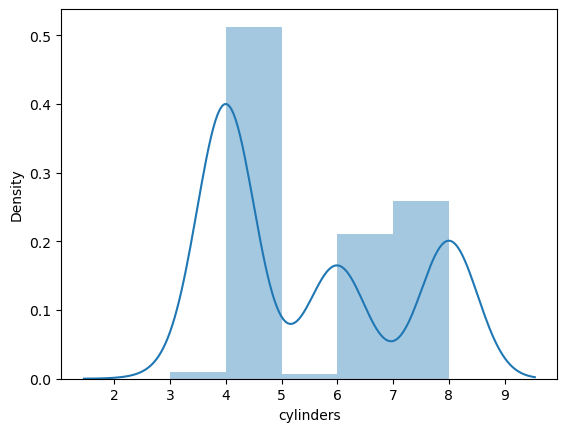

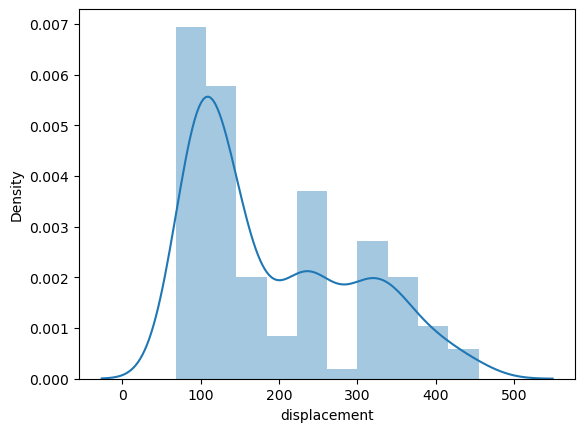

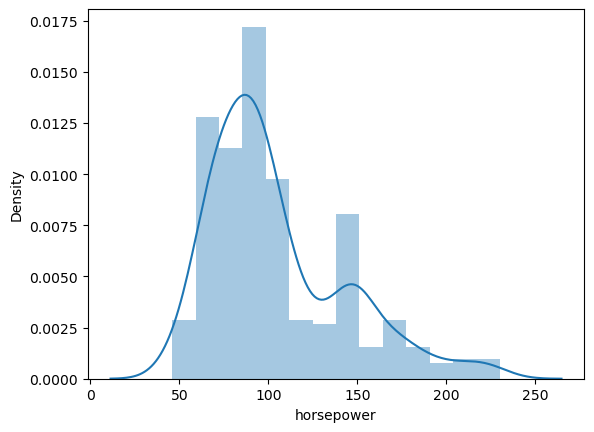

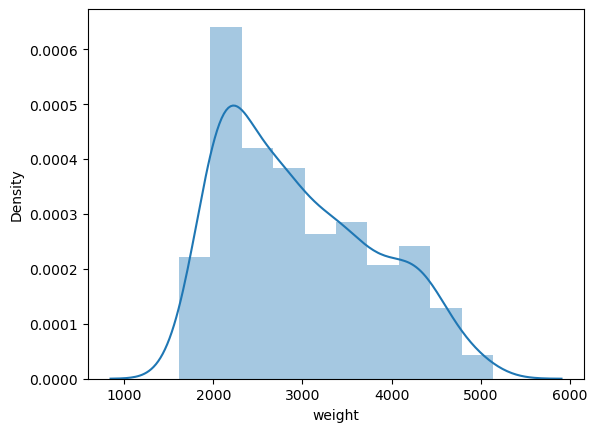

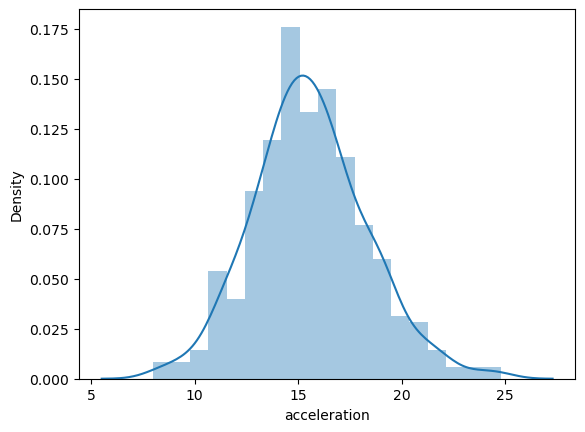

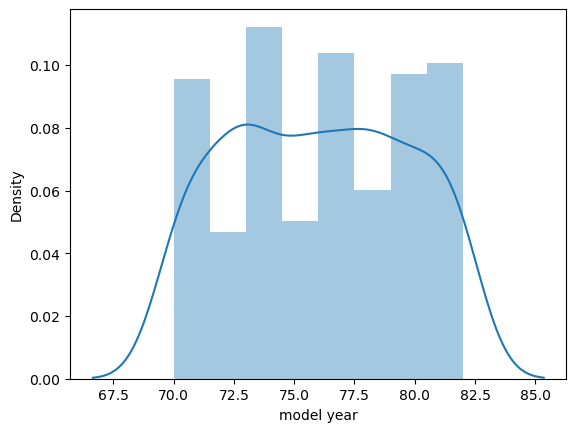

In [20]:
a=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
for i in a:
    plt.figure()
    sns.distplot(X[i])

### As we can see cylinders', 'displacement', 'horsepower', are right skewed
## acceleration is normally distributted
## "model year" seems normal but wider at the center

## "cylinders" has only certain values which repeating often

In [21]:
a=['origin'].

for i in a:
    plt.figure()
    sns.countplot(X[i])

SyntaxError: invalid syntax (4040173244.py, line 1)

C:\Users\Nishi\AppData\Local\Temp\ipykernel_7024\476133659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='mpg', ylabel='Density'>

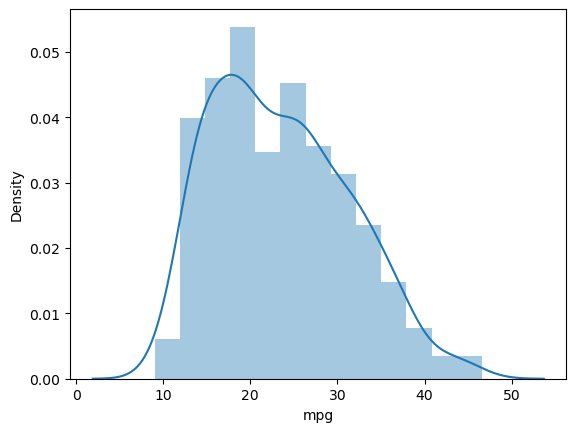

In [187]:
sns.distplot(y)

In [22]:
## Little Skewness towards right

In [23]:
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
stand_X=stand.fit_transform(X)
X_scale = pd.DataFrame(stand_X,columns=X.columns)

stand_y=stand.fit_transform(y)
y_scale = pd.DataFrame(stand_y,columns=y.columns)


In [24]:
# Now split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, test_size = 0.2, random_state = 0)

In [25]:
# apply the linear regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error

def Linear(X_train,Y_train,X_test):
    LR = LinearRegression()
    model = LR.fit(X_train,Y_train)
    y_predict = model.predict(X_test)

    return model,y_predict

def ridge_reg(X_train,Y_train,X_test,alpha=0.5):
    Rid = Ridge(alpha=0.5)
    model = Rid.fit(X_train,Y_train)
    y_predict = model.predict(X_test)

    return model,y_predict


def lasso_reg(X_train,Y_train,X_test,alpha=0.5):
    Las = Lasso(alpha=alpha)
    model = Las.fit(X_train,Y_train)
    y_predict = model.predict(X_test)

    return model,y_predict

# Elastic Net Regression
def elastic_net_regression(X_train, y_train, X_test, alpha=1.0, l1_ratio=0.5):
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return model, predictions

# Testing the models
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse


In [26]:
# Testing Linear Regression
linear_reg_model, linear_reg_predictions = Linear(X_train, y_train, X_test)
linear_reg_mse = evaluate_model(linear_reg_model, X_test, y_test)
print("Linear Regression MSE:", linear_reg_mse)

# Testing Ridge Regression
ridge_model, ridge_predictions = ridge_reg(X_train, y_train, X_test, alpha=0.1)
ridge_mse = evaluate_model(ridge_model, X_test, y_test)
print("Ridge Regression MSE:", ridge_mse)

# Testing Lasso Regression
lasso_model, lasso_predictions = lasso_reg(X_train, y_train, X_test, alpha=0.1)
lasso_mse = evaluate_model(lasso_model, X_test, y_test)
print("Lasso Regression MSE:", lasso_mse)

# Testing Elastic Net Regression
elastic_net_model, elastic_net_predictions = elastic_net_regression(X_train, y_train, X_test, alpha=0.1, l1_ratio=0.1)
elastic_net_mse = evaluate_model(elastic_net_model, X_test, y_test)
print("Elastic Net Regression MSE:", elastic_net_mse)


Linear Regression MSE: 0.1879803332693344
Ridge Regression MSE: 0.18812189473220825
Lasso Regression MSE: 0.19244158803845662
Elastic Net Regression MSE: 0.20285943773839965


In [29]:
# Now check with the Hyperparameter tunning
ridge_train_score = []
ridge_test_score=[]

Lasso_train_score = []
Lasso_test_score=[]

elastic_train_score = []
elastic__test_score=[]

alpha_val = [0.1,0.2,0.3,0.5,0.4,0.6,0.7,0.8,0.9]

for i in alpha_val:
    ridge_model, ridge_predictions = ridge_reg(X_train, y_train, X_test, alpha=i)
    ridge_mse = evaluate_model(ridge_model, X_test, y_test)
    ridge_train_score.append(ridge_model.score(X_train, y_train))
    ridge_test_score.append(ridge_model.score(X_test, y_test))
    

    # Testing Lasso Regression
    lasso_model, lasso_predictions = lasso_reg(X_train, y_train, X_test, alpha=i)
    lasso_mse = evaluate_model(lasso_model, X_test, y_test)
    Lasso_train_score.append(lasso_model.score(X_train, y_train))
    Lasso_test_score.append(lasso_model.score(X_test, y_test))
    

    # Testing Elastic Net Regression
    elastic_net_model, elastic_net_predictions = elastic_net_regression(X_train, y_train, X_test, alpha=i, l1_ratio=0.2)
    elastic_net_mse = evaluate_model(elastic_net_model, X_test, y_test)
    elastic_train_score.append(elastic_net_model.score(X_train, y_train))
    elastic__test_score.append(elastic_net_model.score(X_test, y_test))
  
    


In [30]:
print('Ridge_train accuracy : ',ridge_train_score)
print('MSE_test accuracy: ',ridge_test_score)

Ridge_train accuracy :  [0.8188711527916809, 0.8188711527916809, 0.8188711527916809, 0.8188711527916809, 0.8188711527916809, 0.8188711527916809, 0.8188711527916809, 0.8188711527916809, 0.8188711527916809]
MSE_test accuracy:  [0.8193524674090752, 0.8193524674090752, 0.8193524674090752, 0.8193524674090752, 0.8193524674090752, 0.8193524674090752, 0.8193524674090752, 0.8193524674090752, 0.8193524674090752]


In [272]:
print('Lasso_train score : ',Lasso_train_score)
print('Lasso test score: ',Lasso_test_score)

MSE_Lasso_train :  [0.8152044019303911, 0.7674169473005574, 0.6859249072991486, 0.4434304053820537, 0.5701824875971933, 0.32478462519402174, 0.1864130128563276, 0.02831556836897131, -0.0014167885939102565]
MSE_Lasso:  [0.7952562438860684, 0.7398525340125852, 0.6583127636513497, 0.4247551560451388, 0.5467132690673413, 0.3130688024921402, 0.1810758392022328, 0.0287762661754164, 0.0]


In [37]:
print('elastic_train_score: ',elastic_train_score)
print('elastic_Test_score: ',elastic__test_score)

elastic_train_score:  [0.8065402630395002, 0.7938841360481748, 0.7804346383660187, 0.7493590438049863, 0.7656065397164966, 0.7317750874882603, 0.712975935209121, 0.6930876384693734, 0.672234712088386]
elastic_Test_score:  [0.8075609730661004, 0.7961358673614061, 0.783708041073683, 0.7551882438622675, 0.770174619888642, 0.7387351645104261, 0.7209118586864762, 0.7018456553357062, 0.6816707291891982]


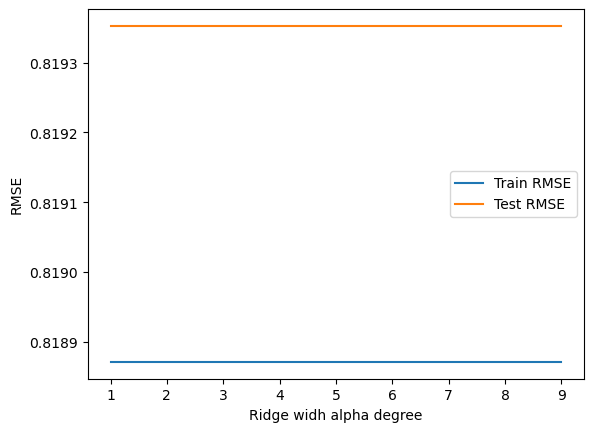

In [32]:
plt.plot(range(1,10), ridge_train_score, label='Train RMSE')
plt.plot(range(1,10), ridge_test_score, label='Test RMSE')

plt.xlabel('Ridge widh alpha degree')
plt.ylabel('RMSE')
plt.legend()

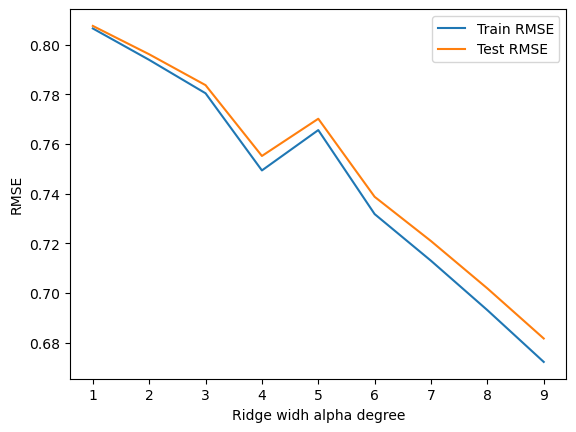

In [38]:
plt.plot(range(1,10), elastic_train_score, label='Train RMSE')
plt.plot(range(1,10), elastic__test_score, label='Test RMSE')

plt.xlabel('Ridge widh alpha degree')
plt.ylabel('RMSE')
plt.legend()

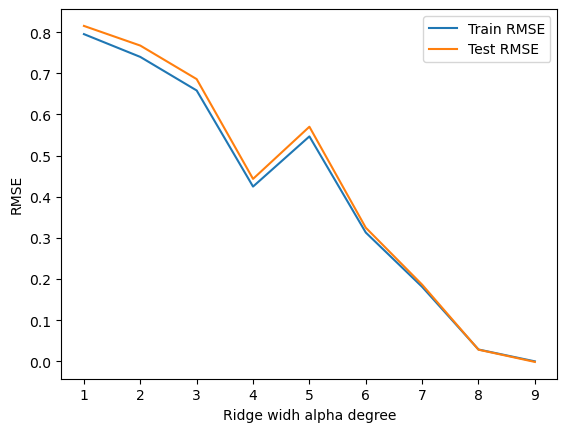

In [35]:
plt.plot(range(1,10), Lasso_train_score, label='Train RMSE')
plt.plot(range(1,10), Lasso_test_score, label='Test RMSE')

plt.xlabel('Ridge widh alpha degree')
plt.ylabel('RMSE')
plt.legend()